In [1]:
from data_labelling import create_labels, config
import os
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
train_df, test_df = create_labels()

In [3]:
train_df["flare_class"].value_counts()

flare_class
A    3651
C    2891
B    1280
M     479
X      35
Name: count, dtype: int64

In [4]:
test_df["flare_class"].value_counts()

flare_class
C    351
A    248
M    151
B    111
X     25
Name: count, dtype: int64

In [5]:
train_df[">= C"] = np.where(
    train_df["flare_class"].isin(["C", "M", "X"]),
    1,
    0
)

train_df[">= C"].value_counts()

>= C
0    4931
1    3405
Name: count, dtype: int64

In [6]:
train_df[">= M"] = np.where(
    train_df["flare_class"].isin(["M", "X"]),
    1,
    0
)

train_df[">= M"].value_counts()

>= M
0    7822
1     514
Name: count, dtype: int64

In [7]:
train_df[">= B"] = np.where(
    train_df["flare_class"].isin(["B", "C", "M", "X"]),
    1,
    0
)

train_df[">= B"].value_counts()

>= B
1    4685
0    3651
Name: count, dtype: int64

In [8]:
def get_random_image_from_folder(folder):
    # Supported image extensions
    extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')
    images = [f for f in os.listdir(folder) if f.lower().endswith(extensions) and 'magnetogram' in f and 'continuum' not in f]
    if not images:
        return None, None
    selected_image = random.choice(images)
    image_path = os.path.join(folder, selected_image)
    return image_path, selected_image

In [9]:
def visualize_one_image_per_folder(folders):
    num_folders = len(folders)
    plt.figure(figsize=(4 * num_folders, 5))

    for i, folder in enumerate(folders):
        image_path, image_name = get_random_image_from_folder(folder)
        if image_path is None:
            print(f"No image found in folder: {folder}")
            continue

        img = Image.open(image_path)

        plt.subplot(1, num_folders, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(folder))
        plt.axis('off')

    plt.tight_layout()
    plt.show()


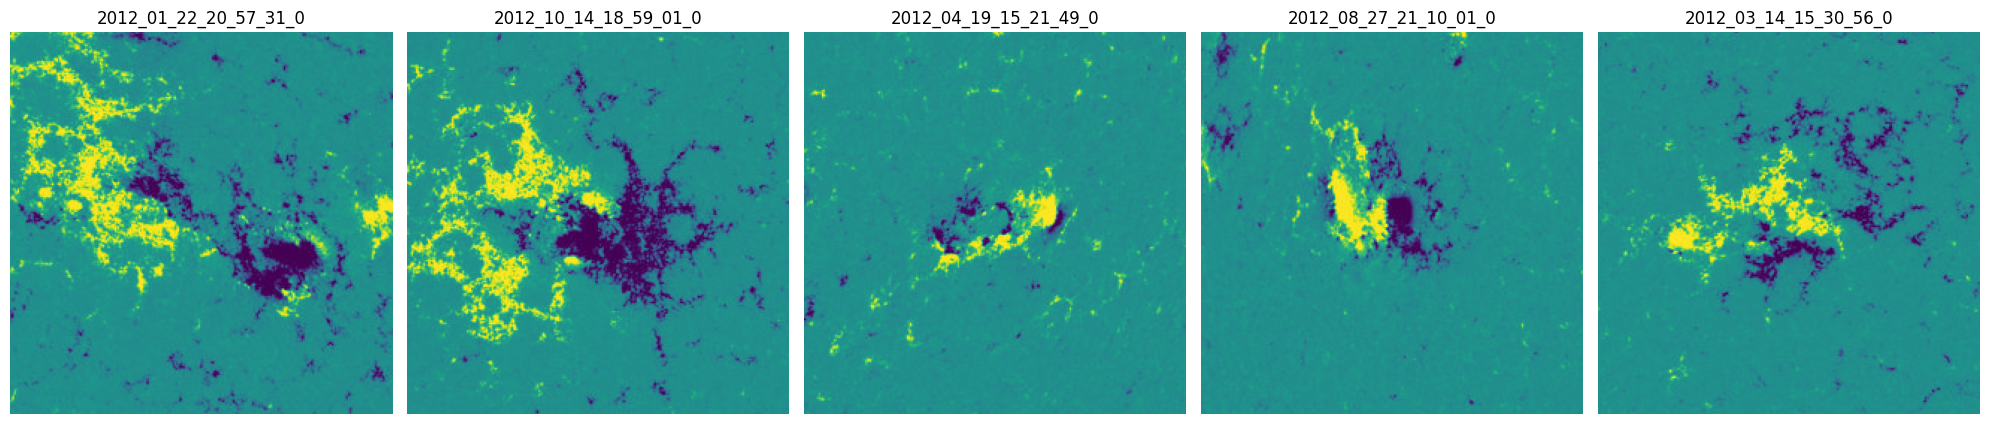

In [10]:
# Plot the 5 Random samples from >= C class flares
folders = train_df[train_df[">= C"] == 1].sample(5)["id"].apply(lambda x: os.path.join(config["dataset_path"]["training_data"], x.split('_')[0] + "/" , '_'.join(x.split('_')[1 : ])))
visualize_one_image_per_folder(folders)

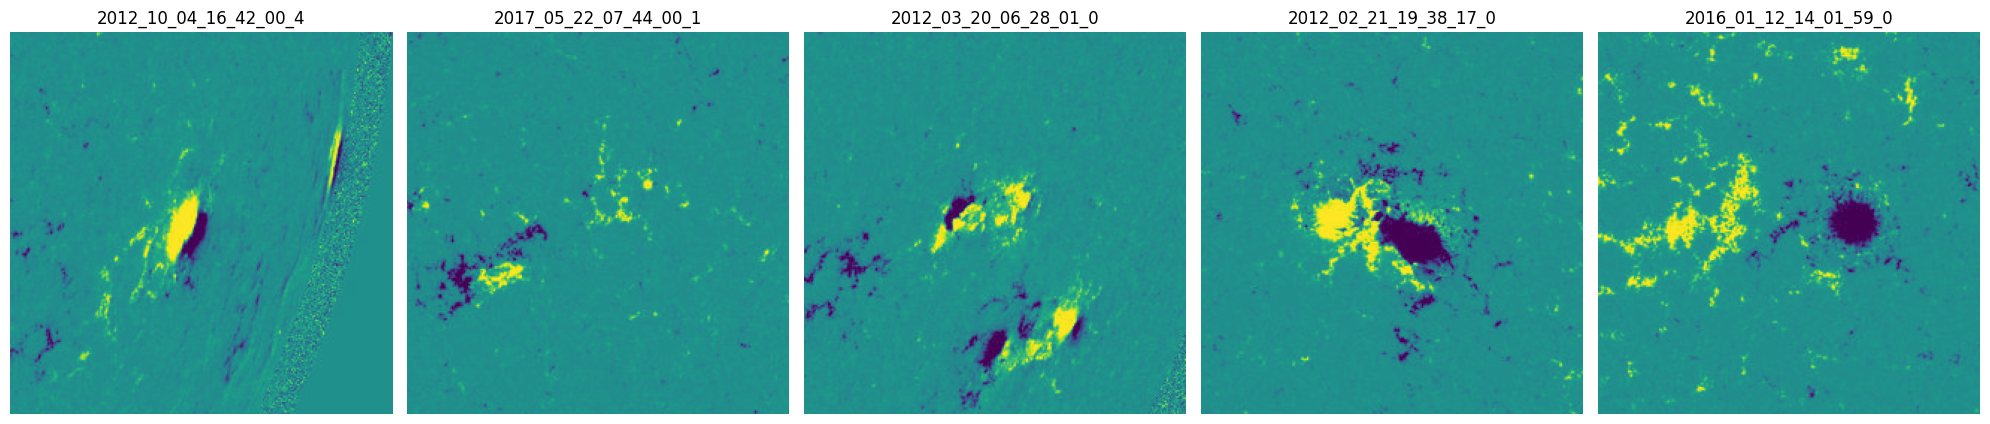

In [11]:
# Plot the 5 Random samples from < C class flares
folders = train_df[train_df[">= C"] == 0].sample(5)["id"].apply(lambda x: os.path.join(config["dataset_path"]["training_data"], x.split('_')[0] + "/" , '_'.join(x.split('_')[1 : ])))
visualize_one_image_per_folder(folders)

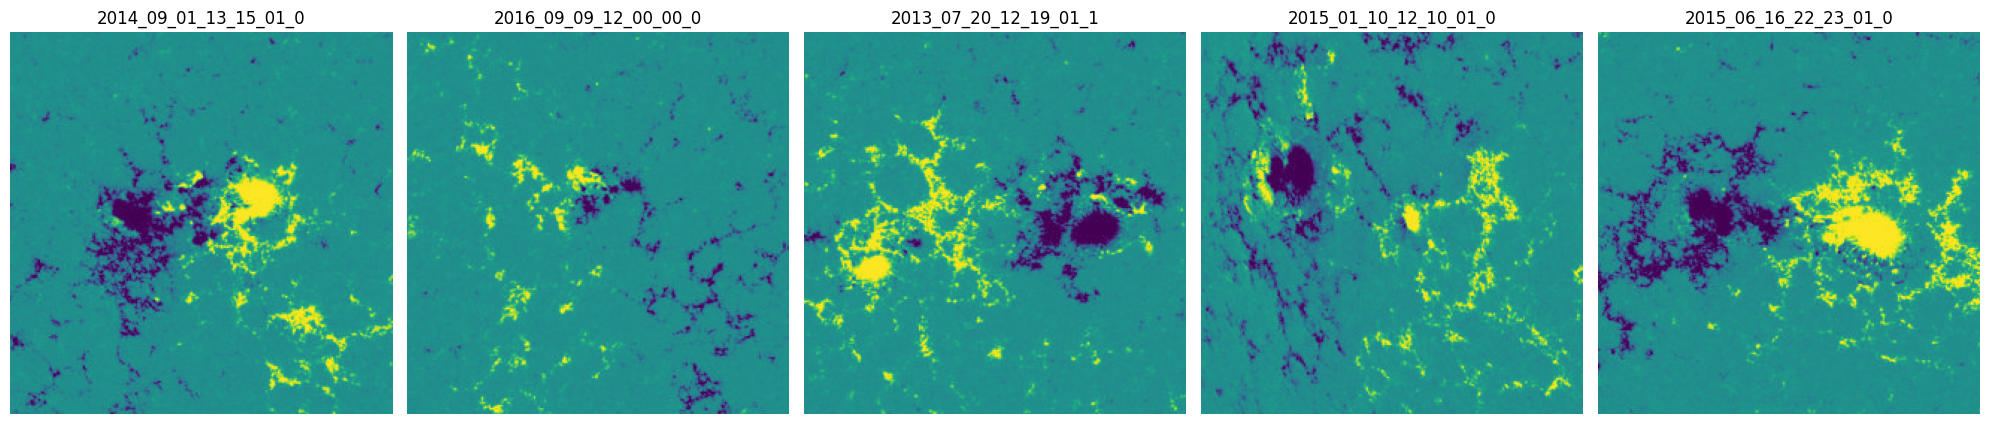

In [12]:
# Plot the 5 Random samples from >= B class flares
folders = train_df[train_df[">= B"] == 1].sample(5)["id"].apply(lambda x: os.path.join(config["dataset_path"]["training_data"], x.split('_')[0] + "/" , '_'.join(x.split('_')[1 : ])))
visualize_one_image_per_folder(folders)

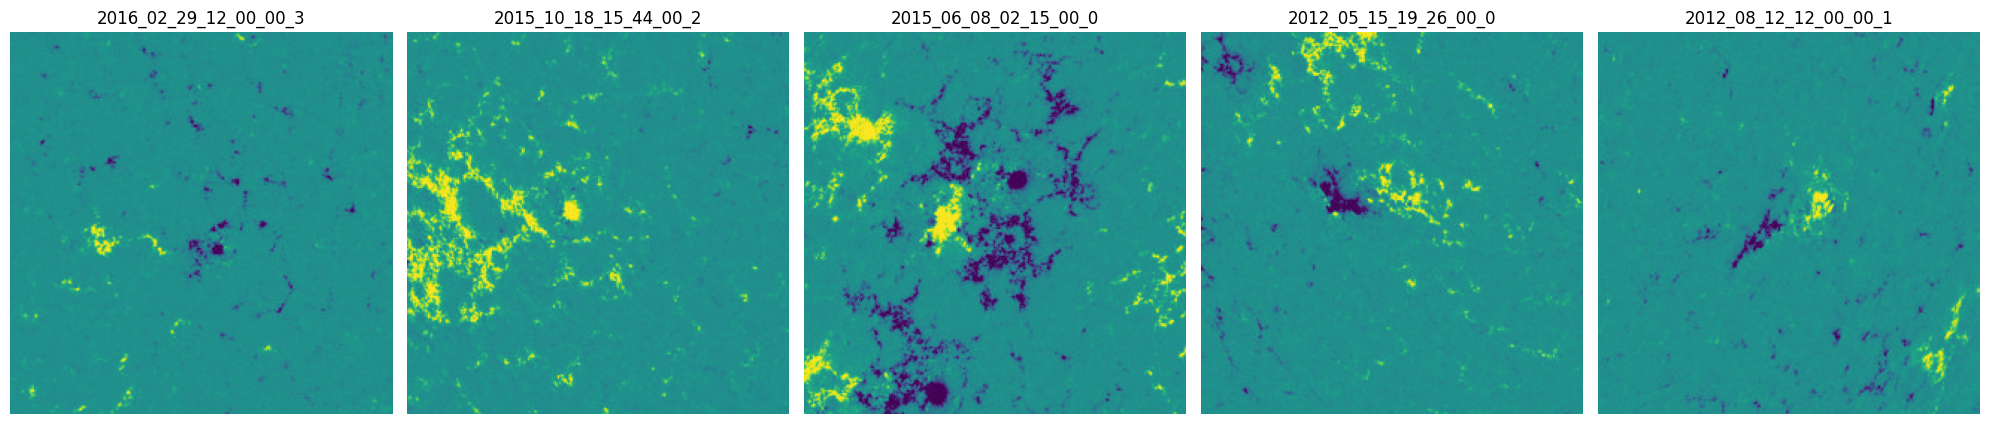

In [13]:
# Plot the 5 Random samples from < B class flares
folders = train_df[train_df[">= B"] == 0].sample(5)["id"].apply(lambda x: os.path.join(config["dataset_path"]["training_data"], x.split('_')[0] + "/" , '_'.join(x.split('_')[1 : ])))
visualize_one_image_per_folder(folders)

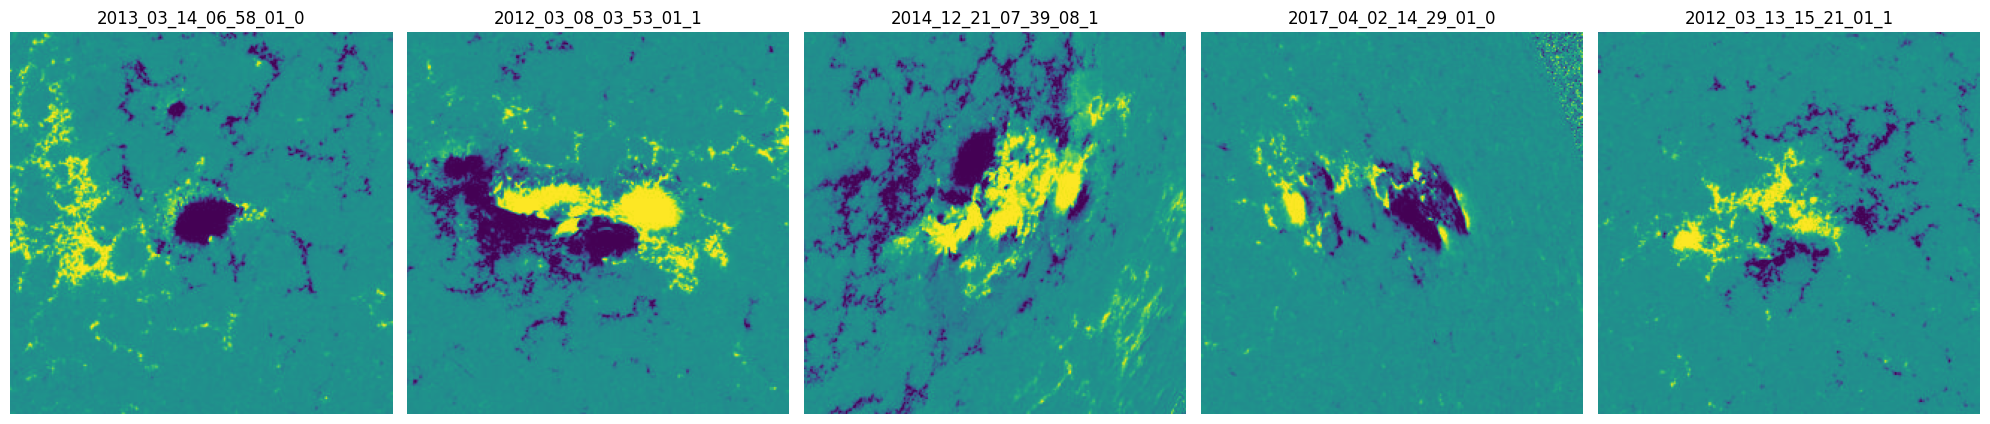

In [14]:
# Plot the 5 Random samples from >= M class flares
folders = train_df[train_df[">= M"] == 1].sample(5)["id"].apply(lambda x: os.path.join(config["dataset_path"]["training_data"], x.split('_')[0] + "/" , '_'.join(x.split('_')[1 : ])))
visualize_one_image_per_folder(folders)

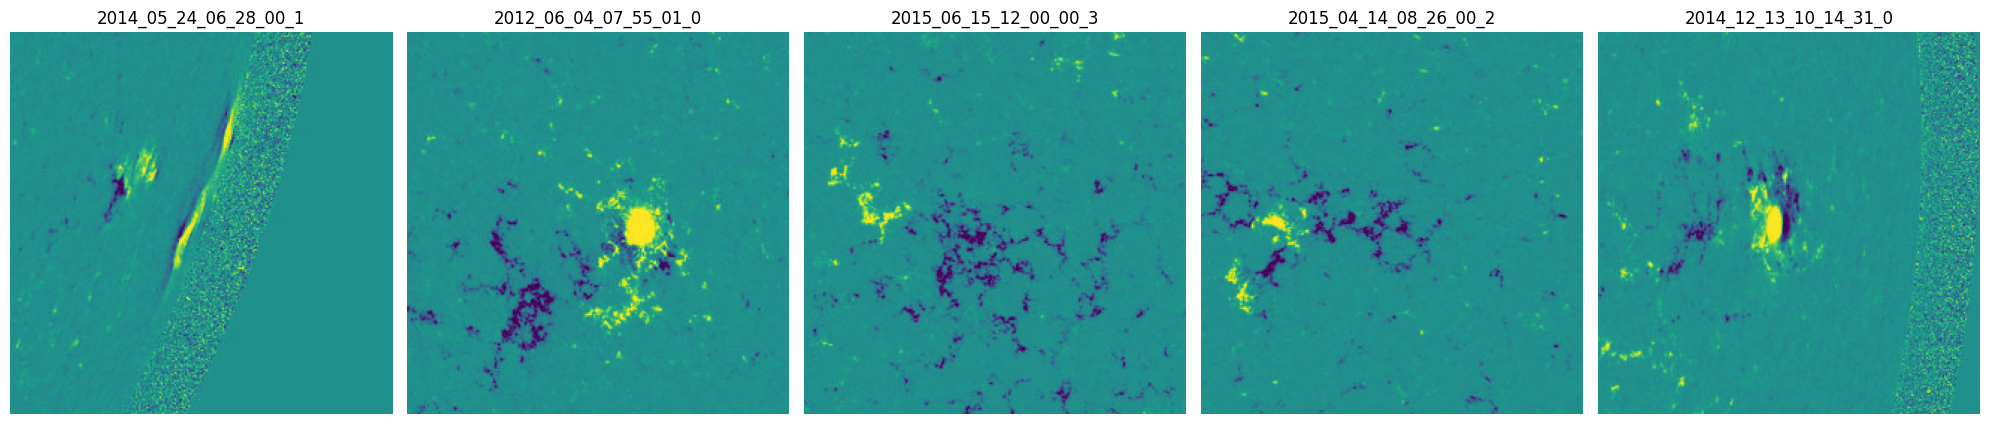

In [15]:
# Plot the 5 Random samples from < M class flares
folders = train_df[train_df[">= M"] == 0].sample(5)["id"].apply(lambda x: os.path.join(config["dataset_path"]["training_data"], x.split('_')[0] + "/" , '_'.join(x.split('_')[1 : ])))
visualize_one_image_per_folder(folders)